In [2]:
!featurize dataset download 915bd4c7-559e-4105-a817-f16fa180d350

zsh:1: command not found: featurize


In [3]:
!featurize dataset download 08c66597-d5ed-45f4-be51-59d6ad217913

zsh:1: command not found: featurize


In [4]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint


import utils
import models

In [5]:
# embed = utils.Embed(w2v_dic='~/data/merge_sgns_bigram_char300.txt')
embed = utils.Embed(w2v_dic='./merge_sgns_bigram_char300.txt')
# embed = lambda x: torch.randn(4, 300)

In [6]:
# DATA_PATH = '/home/featurize/data/medium/'
DATA_PATH = './dataset/medium/'
dataset = utils.ColorfulClothesBin(DATA_PATH, embed=embed, train=True)

In [7]:
etags = []
for i in range(len(dataset)):
    _, etag, _ = dataset[i]
    etags.append(etag[0])
    if i == 50000:
        break

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/0w/j3hd49492bncw4zlczqbyrmr0000gn/T/jieba.cache
Loading model cost 0.316 seconds.
Prefix dict has been built successfully.


In [8]:
etags = torch.stack(etags)
print(etags.shape)
etags = etags.detach().numpy()

torch.Size([50001, 300])


In [9]:
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [10]:
pca = PCA(n_components=2)
pca.fit(etags)

PCA(n_components=2)

In [11]:
etags_pca = pca.transform(etags)
print(etags_pca.shape)

(50001, 2)


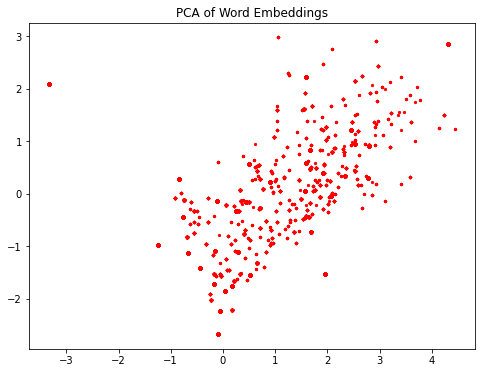

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(etags_pca[:, 0], etags_pca[:, 1], c='r', s=5)
plt.title('PCA of Word Embeddings')
plt.show()

In [1]:
from sklearn.cluster import KMeans

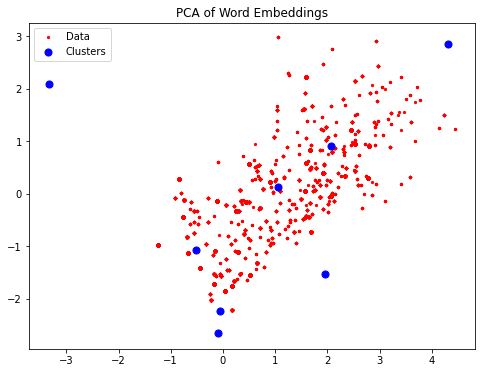

In [21]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(etags)
centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)

plt.figure(figsize=(8, 6))
plt.scatter(etags_pca[:, 0], etags_pca[:, 1], c='r', s=5, label='Data')
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='b', s=50, label='Clusters')
plt.legend()
plt.title('PCA of Word Embeddings')
plt.show()